# Lecture 5.2: Tidy Data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand what makes [tidy data](#Tidy-data) and why we care
* [Gather](#Gather) multiple columns into one
* [Spread](#Spread) one column into several
* [Separate](#Separate) and [unite](#Unite) columns
* Impute [missing values](#Missing-values)
    
This lecture note corresponds to Chapter 12 of your book. 
</div>


    




In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Tidy data
There are many different ways to represent data in a table, but some are better than others.
We say that a data table is "[tidy](http://vita.had.co.nz/papers/tidy-data.pdf)" if:
- Each row represents an observation.
- Each column represents a variable.
- Each value gets its own cell.
- Each different type of data set gets its own table.

Data tables which are not tidy are called messy!
![http://r4ds.had.co.nz/images/tidy-1.png](http://r4ds.had.co.nz/images/tidy-1.png)

## Why we care about tidy data
The tools we have learned so far all live in the `tidyverse`. This means that each tool expect to recieve tidy data as input, and, where necessary, returns tidy data as output. You can think of tidy data as a sort of contract that everything in `tidyverse` respects. This makes it possible to string many tidyverse commands together using `%>%`  without having to worry about whether they all work together.

The mutate command expects tidy data and returns tidy data.

In the following, we are going to ouput several tables data.  These `table` data are part of your `tidyverse` package.

In [3]:
print(table1)

# A tibble: 6 x 4
  country      year  cases population
  <chr>       <int>  <int>      <int>
1 Afghanistan  1999    745   19987071
2 Afghanistan  2000   2666   20595360
3 Brazil       1999  37737  172006362
4 Brazil       2000  80488  174504898
5 China        1999 212258 1272915272
6 China        2000 213766 1280428583


In the above data set, each column is a variable and every entries in the same column is of the same type. So therefore this data set is tidy.

Now let us take a look at the following data set obtained by merging the cases and population into the `type` variable.

In [3]:
print(table2)

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In the type column, you have two variables cases and population.   For a data to be tidy, each variable needs to be in each column.  So this data is messy.

How about the following table? 

In [7]:
table3 %>% print

# A tibble: 6 x 3
  country      year rate             
* <chr>       <int> <chr>            
1 Afghanistan  1999 745/19987071     
2 Afghanistan  2000 2666/20595360    
3 Brazil       1999 37737/172006362  
4 Brazil       2000 80488/174504898  
5 China        1999 212258/1272915272
6 China        2000 213766/1280428583


The above table is also messy, because the counts for cases and population is defined as a division in the variable rate.  So this data is also messy.

In [9]:
print(table4a) # cases in one tibble
print(table4b) # population in another one

# A tibble: 3 x 3
  country     `1999` `2000`
* <chr>        <int>  <int>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766
# A tibble: 3 x 3
  country         `1999`     `2000`
* <chr>            <int>      <int>
1 Afghanistan   19987071   20595360
2 Brazil       172006362  174504898
3 China       1272915272 1280428583


The above is a messy data, since each observation for different year is separated into columns.

Recapping: tidy data means

* each observation has its own row
* each variable has its own column
* each value has its own cell

## Why we care about tidy data
The tools we have learned so far all live in the `tidyverse`. This means that each tool expects to recieve tidy data as input, and, where necessary, returns tidy data as output. You can think of tidy data as a sort of contract that everything in `tidyverse` respects. This makes it possible to string many tidyverse commands together using `%>%`  without having to worry about whether they all work together.

For instance, let us calculate rate of cases per 10000 people for the data in `table1`.

In [10]:
mutate(table1, rate = cases / population * 10000) # rate of cases per 10000 peoplev

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


How would we calculate the `rate` variable using `table2`? 

In [12]:
print(table2)

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In [13]:
#  mutate(table2, rate=???)  not possible to use mutate

Summary commands like `summarize` and `count` also preserve tidy data:

In [14]:
count(table1, year, wt = cases) # compute no. of cases for each year

year,n
<int>,<int>
1999,250740
2000,296920


In [16]:
count(table1, year, wt = population) # compute no. of cases for each year

year,n
<int>,<int>
1999,1464908705
2000,1475528841


`ggplot` also expects tidy data.  What if we plot a table with a messy data?

In [18]:
print(table2)

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


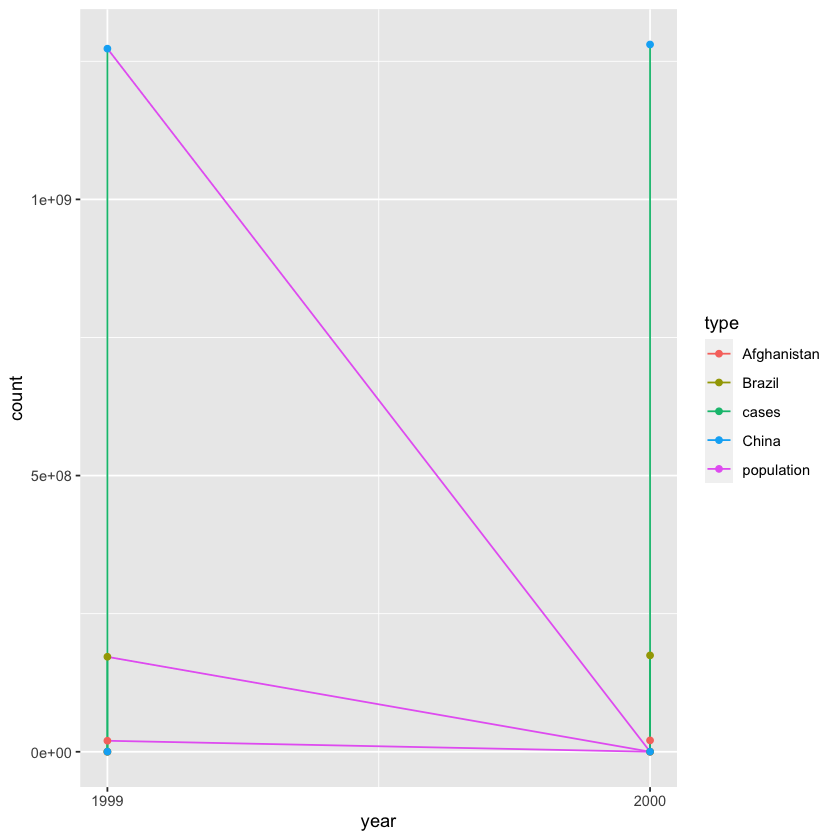

In [17]:
ggplot(table2, aes(x=year, y=count, color=type)) +
    geom_line(aes(group = country)) +
    geom_point(aes(color = country)) +
    scale_x_continuous(breaks=c(1999, 2000))

It seems like ggplot is treating both cases and populations as some data point too.  I am not sure what is going on in the above plot with a messy data.

**Remark** Extremely important to only use the functions we have learnt for tidy data.

## Creating tidy data
If the data is not already tidy, then we might need to some work before we can use the tools in `dplyr`. The package `tidyr` inside `tidyverse` allows one to convert data into the tidy data.

### Gather
One common problem in when a variable is spread across multiple columns and we need to gather those columns to create a new pair of variables. For example, consider `table4a` from above:

In [19]:
print(table4a)

# A tibble: 3 x 3
  country     `1999` `2000`
* <chr>        <int>  <int>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766


Here there is a year variable which is spread across two columns. To become tidy, it should get its own `year` column. We want to *gather* the columns of year into a single column.
![gather illustration](http://r4ds.had.co.nz/images/tidy-9.png)

The command to do this is called `gather()`. To use `gather()` we need to specify three things:

* which existing columns correspond to values of a variable
* what is the name of the variable (the **key**) whose values currently appear as column names.
* what is the name of the variable (the **value**) whose values are currently spread over the cells.

(When using `gather()`, neither the **key** nor **value** column names currently exist in your data. They are "destination" columns in the new table.)

In [22]:
table4a %>% print %>% 
    gather(key = year, value = cases, c("1999", "2000")) 

# A tibble: 3 x 3
  country     `1999` `2000`
* <chr>        <int>  <int>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766


country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


### Exercise
Let us try to transform `table4b` to tidy format:

In [3]:
print(table4b)

table4b %>% gather(c("1999", "2000"),
                   key=year,
                   value=population) %>% print()

# A tibble: 3 x 3
  country         `1999`     `2000`
* <chr>            <int>      <int>
1 Afghanistan   19987071   20595360
2 Brazil       172006362  174504898
3 China       1272915272 1280428583
# A tibble: 6 x 3
  country     year  population
  <chr>       <chr>      <int>
1 Afghanistan 1999    19987071
2 Brazil      1999   172006362
3 China       1999  1272915272
4 Afghanistan 2000    20595360
5 Brazil      2000   174504898
6 China       2000  1280428583


### Spread
Another type of problem is when an observation is scattered across multiple rows.

Here we want to do the opposite of gather: we want to *spread* these rows out into new columns.
![spread data](http://r4ds.had.co.nz/images/tidy-8.png)

We need to specify two things:

* which existing column (the **key**) has the variable names as values
* which existing column (the **value**) has the values for those variables

What is the key here? What is the value?

### Exercise
Convert `table2` to tidy format using `spread()`.

In [5]:
print(table2)

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In [6]:
table2 %>% spread(key = type, value = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Summary

* `gather` tends to make wide tables narrower and longer
* `spread` tends to make long tables shorter and wider
* `gather` and `spread` are inverses -- each one undos the other.

Sometimes we want to `spread()` data for other reasons. Some tables are more readable if they are put in a non-tidy format. This is often the case with time data.Sometimes we want to `spread()` data for other reasons. Some tables are more readable if they are put in a non-tidy format. This is often the case with time data.

### Exercise
Use `spread()` to put the `year` variable of `table1` into columns (show `population` only):
```
  country     1999       2000      
1 Afghanistan   19987071   20595360
2 Brazil       172006362  174504898
3 China       1272915272 1280428583
```

In [8]:
print(table1)

# A tibble: 6 x 4
  country      year  cases population
  <chr>       <int>  <int>      <int>
1 Afghanistan  1999    745   19987071
2 Afghanistan  2000   2666   20595360
3 Brazil       1999  37737  172006362
4 Brazil       2000  80488  174504898
5 China        1999 212258 1272915272
6 China        2000 213766 1280428583


In [11]:
table1 %>% select(-cases) %>% spread(key = year, value = population)

country,1999,2000
<chr>,<int>,<int>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


Now let us apply the tools that we have learnt to the `flights` data set

### Exercise
Re-create the following table which shows monthly departures from the three NYC airports:
```
  origin 1    2    3     4     5     6     7     8     9    10    11   12  
1 EWR    9893 9107 10420 10531 10592 10175 10475 10359 9550 10104 9707 9922
2 JFK    9161 8421  9697  9218  9397  9472 10023  9983 8908  9143 8710 9146
3 LGA    7950 7423  8717  8581  8807  8596  8927  8985 9116  9642 8851 9067
```

In [14]:
## Solution
library(nycflights13)
print(flights)

#flights %>% group_by(origin, month) %>% summarize(departures = n()) %>% print
count(flights, origin, month) %>% spread(key = month, value = n)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# … with 336,766 more rows,

`summarise()` regrouping output by 'origin' (override with `.groups` argument)



# A tibble: 36 x 3
# Groups:   origin [3]
   origin month departures
   <chr>  <int>      <int>
 1 EWR        1       9893
 2 EWR        2       9107
 3 EWR        3      10420
 4 EWR        4      10531
 5 EWR        5      10592
 6 EWR        6      10175
 7 EWR        7      10475
 8 EWR        8      10359
 9 EWR        9       9550
10 EWR       10      10104
# … with 26 more rows


origin,1,2,3,4,5,6,7,8,9,10,11,12
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
EWR,9893,9107,10420,10531,10592,10175,10475,10359,9550,10104,9707,9922
JFK,9161,8421,9697,9218,9397,9472,10023,9983,8908,9143,8710,9146
LGA,7950,7423,8717,8581,8807,8596,8927,8985,9116,9642,8851,9067


### Spreading more than one column
Consider the following simple table:

In [16]:
grades <- tribble(
    ~person, ~exam, ~q1, ~q2, ~q3,
    "alice", "mt1", 1, 2, 3.5,
    "alice", "mt2", .5, 2.5, 1.5,
    "bob", "mt1", 0.0, 1.0, 1.5,
    "bob", "mt2", 1.5, 2.5, 2.0
)

In [17]:
print(grades)

# A tibble: 4 x 5
  person exam     q1    q2    q3
  <chr>  <chr> <dbl> <dbl> <dbl>
1 alice  mt1     1     2     3.5
2 alice  mt2     0.5   2.5   1.5
3 bob    mt1     0     1     1.5
4 bob    mt2     1.5   2.5   2  


Suppose we want to expand this into multiple columns `mt1.q1`, `mt1.q2`, and so on. How should we use `spread()`?

In [18]:
grades %>% spread(key=exam, value=q1)

person,q2,q3,mt1,mt2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
alice,2.0,3.5,1,NA
alice,2.5,1.5,NA,0.5
bob,1.0,1.5,0,NA
bob,2.5,2.0,NA,1.5


We have uncovered a limitation of `spread()`. It can only operate on a single key-value pair. (This is on purpose, in order to keep the command simple.)

### Unite and separate
To `spread()` multiple values at once we'll use the `unite()` command to combine them into a single variable. The unite command does the opposite of `separate()`: stick several variables together to form a new variable.

In [21]:
unite(grades, col="q", q1:q3) 

person,exam,q
<chr>,<chr>,<chr>
alice,mt1,1_2_3.5
alice,mt2,0.5_2.5_1.5
bob,mt1,0_1_1.5
bob,mt2,1.5_2.5_2


`unite()` has taken each of the values q1, q2, q3 and combined them into a single column. Now we can `spread()` the `q` column to obtain:

In [22]:
unite(grades, col="q", q1:q3) %>% spread(key=exam, value=q)

person,mt1,mt2
<chr>,<chr>,<chr>
alice,1_2_3.5,0.5_2.5_1.5
bob,0_1_1.5,1.5_2.5_2


In [23]:
unite(grades, col="q", q1:q3) %>% spread(key=exam, value=q) %>% 
    separate(mt1, into = paste0("mt1.q", 1:3), sep="_") %>% 
    separate(mt2, into = paste0("mt2.q", 1:3), sep="_")

person,mt1.q1,mt1.q2,mt1.q3,mt2.q1,mt2.q2,mt2.q3
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
alice,1,2,3.5,0.5,2.5,1.5
bob,0,1,1.5,1.5,2.5,2


## Missing Values
Missing values can be:

* **Explicit** (marked as `NA` in our data); or
* **Implicit** (not present in the data).

In [24]:
(stocks <- tibble(
  year   = c(2015, 2015, 2015, 2015, 2016, 2016, 2016),
  qtr    = c(   1,    2,    3,    4,    2,    3,    4),
  return = c(1.88, NA, 0.35,   0.8, 0.92, 0.17, 2.66)
))
mutate(stocks, last_qtr_ret = lag(return))

year,qtr,return
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,NA
2015,3,0.35
2015,4,0.80
2016,2,0.92
2016,3,0.17
2016,4,2.66


year,qtr,return,last_qtr_ret
<dbl>,<dbl>,<dbl>,<dbl>
2015,1,1.88,NA
2015,2,NA,1.88
2015,3,0.35,NA
2015,4,0.80,0.35
2016,2,0.92,0.80
2016,3,0.17,0.92
2016,4,2.66,0.17


In this example we have one explicitly missing value for the 4th quarter of 2015. Are there any other missing values? Yes, because we do not have an observation for the first quarter of 2016.

The **complete** command makes implicit missing value explicit by considering all combinations of unique values of specified variables.

In [25]:
complete(stocks, year, qtr) %>% mutate(last_qtr_ret = lag(return))

year,qtr,return,last_qtr_ret
<dbl>,<dbl>,<dbl>,<dbl>
2015,1,1.88,NA
2015,2,NA,1.88
2015,3,0.35,NA
2015,4,0.80,0.35
2016,1,NA,0.80
2016,2,0.92,NA
2016,3,0.17,0.92
2016,4,2.66,0.17


The missing values also become explicit if we **spread** the tibble.

In [26]:
spread(stocks, key = year, value = return)

qtr,2015,2016
<dbl>,<dbl>,<dbl>
1,1.88,NA
2,NA,0.92
3,0.35,0.17
4,0.80,2.66


**gather** will keep all these explicitly missing values by default.

In [27]:
stocks %>%
    spread(key = year, value = return) %>% 
    gather(`2015`, `2016`, key = year, value = return)

qtr,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
2,2015,NA
3,2015,0.35
4,2015,0.80
1,2016,NA
2,2016,0.92
3,2016,0.17
4,2016,2.66


If you don't like the default behavior of **gather**, you can turn off explicit missing values using the `na.rm` argument.

In [28]:
stocks %>%
    spread(key = year, value = return) %>%
    gather(`2015`, `2016`, key = year, 
           value = return, na.rm = TRUE)

qtr,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
3,2015,0.35
4,2015,0.80
2,2016,0.92
3,2016,0.17
4,2016,2.66
